**Info of the document:**

It is the coursework of the UCL CASA module Data Science for Spatial Systems (CASA0006).

This jupyter notebook contains the all written work with codes.

Code and data are both uploaded to Github. [click here](https://github.com/amberyli/DSSS-cw)

Word Count: 2675

Run time is around 1.5 minutes.

---

# Which is the most important factor in Economic Freedom?

## 1. Introduction and Literature Review

With the accelerating development of society, more and more attention focus on economic growth. Every economy is making all efforts to gain an improvement. At this stage, the freedom of economic are noted. Niclas Berggren [1] believes that economic freedom is an important factor accounting for economic growth is probable on purely theoretical grounds. According to the reserach of Corbi [2],  adoption and maintenance of institutions and policies consistent with economic freedom are vitally important for the achievement of prosperity. Countries with more economic freedom attract more investment and achieve greater productivity from their resources. Also, Esposto and Zaleski [3] found that greater economic freedom enhances quality of life both across nations and increases the improvements in quality of life over time. Though all these studies illustrates how important the economic freedom is, the analysis of which factor would have larger impact on this freedom seems to be ignored. This research would outline the methods and outcomes of the analysis of the Economic Freedom Index (EFI) in order to measure the importance of its factors. The source data is collected from the report [4] of 2021 Index of Economic Freedom published by a think-tank, Heritage Foundation. The methods would concentrate on Regression and Classification. This analysis would not only contribute to the enhancement of policy making, but also help people to have deeper understanding of economic freedom.

### Question

The key focus of this report would be:

- **Which variables are more important than the others in Economic Freedom Index?**

## 2. Presenting Data

### 2.1 Preparation

#### 2.1.1 Load packages

It is a summary of packages used to run the code stuff in this report with the corresponding comments.

In [1]:
# Packages List

# Packages for Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Stepwise
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression

# Packages for Lasso
from sklearn import linear_model
from itertools import cycle
from sklearn.linear_model import lasso_path

# Packages for Train and Test
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

# Packages for Decision Tree and Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

The following is used to suppress warnings for better view.

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### 2.1.2 Import datasets

Checking the explanation from the report, it is found that the final Economic Freedom Index is calculated by 12 subindexes of freedoms. In this report, they would be treated as variables and the EFI is the response. The table shown below illustrates the brief explanation and their new names that would be used in the following steps.

**Table 1**

|Original Name              | In Short    | Explanation
|:-------------------------:| :---------: | :---------:
|    '2021 Score'           |'Score'      | The Economic Freedom Index (EFI)
|    'Property Rights'      |'PRights'    | Legal protection of private property rights
|    'Judical Effectiveness'|'Law'        | Efficiency and fairness of Judiciary
|    'Government Integrity' |'GIntegrity' | Prevalence of political corruption
|    'Tax Burden'           |'Tax'        | Taxation Level
|    "Gov't Spending"       |'GSpending'  | Burden of government expenditures
|    'Fiscal Health'        |'Fiscal'     | Budegt of debt and deficit
|    'Business Freedom'     |'Business'   | Cost of opening, operating and closing business
|    'Labor Freedom'        |'Labor'      | Labor rights
|    'Monetary Freedom'     |'Money'      | Price stability 
|    'Trade Freedom'        |'Trade'      | Tariff and nontariff barriers of imports and exports
|    'Investment Freedom '  |'Invest'     | Constraint of investment capital
|    'Financial Freedom'    |'Finance'    | Efficiency of bank



In [3]:
data = pd.read_excel('index2021_data.xls')

#### 2.1.3 Data cleaning

In order to improve the experience of visualisation, replace the names of the 12 variables to shorter ones. Also, eliminate the detailed figures used for their calculation, as they would not be used in the analysis. The only exception is the column 'Region', because it is necessary to divide points into different colour groups in the scatter plots. Though it is not included in calculating the freedom score, the step is to check whether there is obvious difference among regions.

In [4]:
# Rename the columns
data = data.rename(columns={
    '2021 Score'           :'Score',
    'Property Rights'      :'PRights',
    'Judical Effectiveness':'Law',
    'Government Integrity' :'GIntegrity',
    'Tax Burden'           :'Tax',
    "Gov't Spending"       :'GSpending',
    'Fiscal Health'        :'Fiscal',
    'Business Freedom'     :'Business',
    'Labor Freedom'        :'Labor',
    'Monetary Freedom'     :'Money',
    'Trade Freedom'        :'Trade',
    'Investment Freedom '  :'Invest',
    'Financial Freedom'    :'Finance',
})

# For General View, make another dataset with the Region for exploration
data_region = data.drop(['CountryID', 
              'WEBNAME',
              'World Rank',
              'Region Rank',
              'Tariff Rate (%)',
              'Income Tax Rate (%)',
              'Corporate Tax Rate (%)',
              'Tax Burden % of GDP',
              "Gov't Expenditure % of GDP ",
              'Country',
              'Population (Millions)',
              'GDP (Billions, PPP)',
              'GDP Growth Rate (%)',
              '5 Year GDP Growth Rate (%)',
              'GDP per Capita (PPP)',
              'Unemployment (%)',
              'Inflation (%)',
              'FDI Inflow (Millions)',
              'Public Debt (% of GDP)'], 
             axis=1)

# Drop the unnecessary columns
data = data.drop(['CountryID', 
              'WEBNAME',
              'Region',
              'World Rank',
              'Region Rank',
              'Tariff Rate (%)',
              'Income Tax Rate (%)',
              'Corporate Tax Rate (%)',
              'Tax Burden % of GDP',
              "Gov't Expenditure % of GDP ",
              'Country',
              'Population (Millions)',
              'GDP (Billions, PPP)',
              'GDP Growth Rate (%)',
              '5 Year GDP Growth Rate (%)',
              'GDP per Capita (PPP)',
              'Unemployment (%)',
              'Inflation (%)',
              'FDI Inflow (Millions)',
              'Public Debt (% of GDP)'], 
             axis=1)

In [5]:
# Check NA values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  184 non-null    object 
 1   Score         178 non-null    float64
 2   PRights       183 non-null    float64
 3   Law           183 non-null    float64
 4   GIntegrity    183 non-null    float64
 5   Tax           178 non-null    float64
 6   GSpending     181 non-null    float64
 7   Fiscal        181 non-null    float64
 8   Business      183 non-null    float64
 9   Labor         182 non-null    float64
 10  Money         182 non-null    float64
 11  Trade         180 non-null    float64
 12  Invest        181 non-null    float64
 13  Finance       179 non-null    float64
dtypes: float64(13), object(1)
memory usage: 20.2+ KB


From above, the dataset includes 184 countries, and there exists missing values. The decision of replacing them with 0 or deleting them should be made after carefully present them.

In [6]:
null_data = data[data.isnull().any(axis=1)]
null_data

,Country Name,Score,PRights,Law,GIntegrity,Tax,GSpending,Fiscal,Business,Labor,Money,Trade,Invest,Finance
77,Iraq,NaN,44.8,11.0,22.0,NaN,65.3,94.7,51.7,45.6,77.0,NaN,NaN,NaN
97,Libya,NaN,16.5,19.7,21.0,NaN,0.0,19.9,38.4,55.3,69.7,NaN,5.0,NaN
98,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,80.0
151,Somalia,NaN,27.8,23.3,11.5,NaN,NaN,NaN,31.2,NaN,NaN,NaN,NaN,NaN
159,Syria,NaN,42.5,19.7,25.9,NaN,NaN,NaN,49.7,57.8,60.6,47.0,0.0,NaN
181,Yemen,NaN,16.5,19.7,17.0,NaN,95.6,48.9,46.1,57.7,54.6,67.4,NaN,NaN


As they have empty values in the 12 freedoms, their final scores cannot be calculated and are left as 'NaN'. If keep them and fill the NA values with zero, it would mislead the analysis. The logic behind is that they cannot describe which factor(s) have more impact on the score as it is 0. So they should be dropped.

In [7]:
data = data.dropna()
data_region = data_region.dropna()

#### 2.1.4 Type

Besides, it is important to check the data type to ensure the code of further analysis can run properly.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 183
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   Score         178 non-null    float64
 2   PRights       178 non-null    float64
 3   Law           178 non-null    float64
 4   GIntegrity    178 non-null    float64
 5   Tax           178 non-null    float64
 6   GSpending     178 non-null    float64
 7   Fiscal        178 non-null    float64
 8   Business      178 non-null    float64
 9   Labor         178 non-null    float64
 10  Money         178 non-null    float64
 11  Trade         178 non-null    float64
 12  Invest        178 non-null    float64
 13  Finance       178 non-null    float64
dtypes: float64(13), object(1)
memory usage: 20.9+ KB


In [9]:
data_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 183
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  178 non-null    object 
 1   Region        178 non-null    object 
 2   Score         178 non-null    float64
 3   PRights       178 non-null    float64
 4   Law           178 non-null    float64
 5   GIntegrity    178 non-null    float64
 6   Tax           178 non-null    float64
 7   GSpending     178 non-null    float64
 8   Fiscal        178 non-null    float64
 9   Business      178 non-null    float64
 10  Labor         178 non-null    float64
 11  Money         178 non-null    float64
 12  Trade         178 non-null    float64
 13  Invest        178 non-null    float64
 14  Finance       178 non-null    float64
dtypes: float64(13), object(2)
memory usage: 22.2+ KB


Notice 'Country Name' and 'Region' are both object and the others are float. There is no need to amend the data type anymore.

### 2.2 Data Exploration

#### 2.2.1 Scatterplots and Histograms

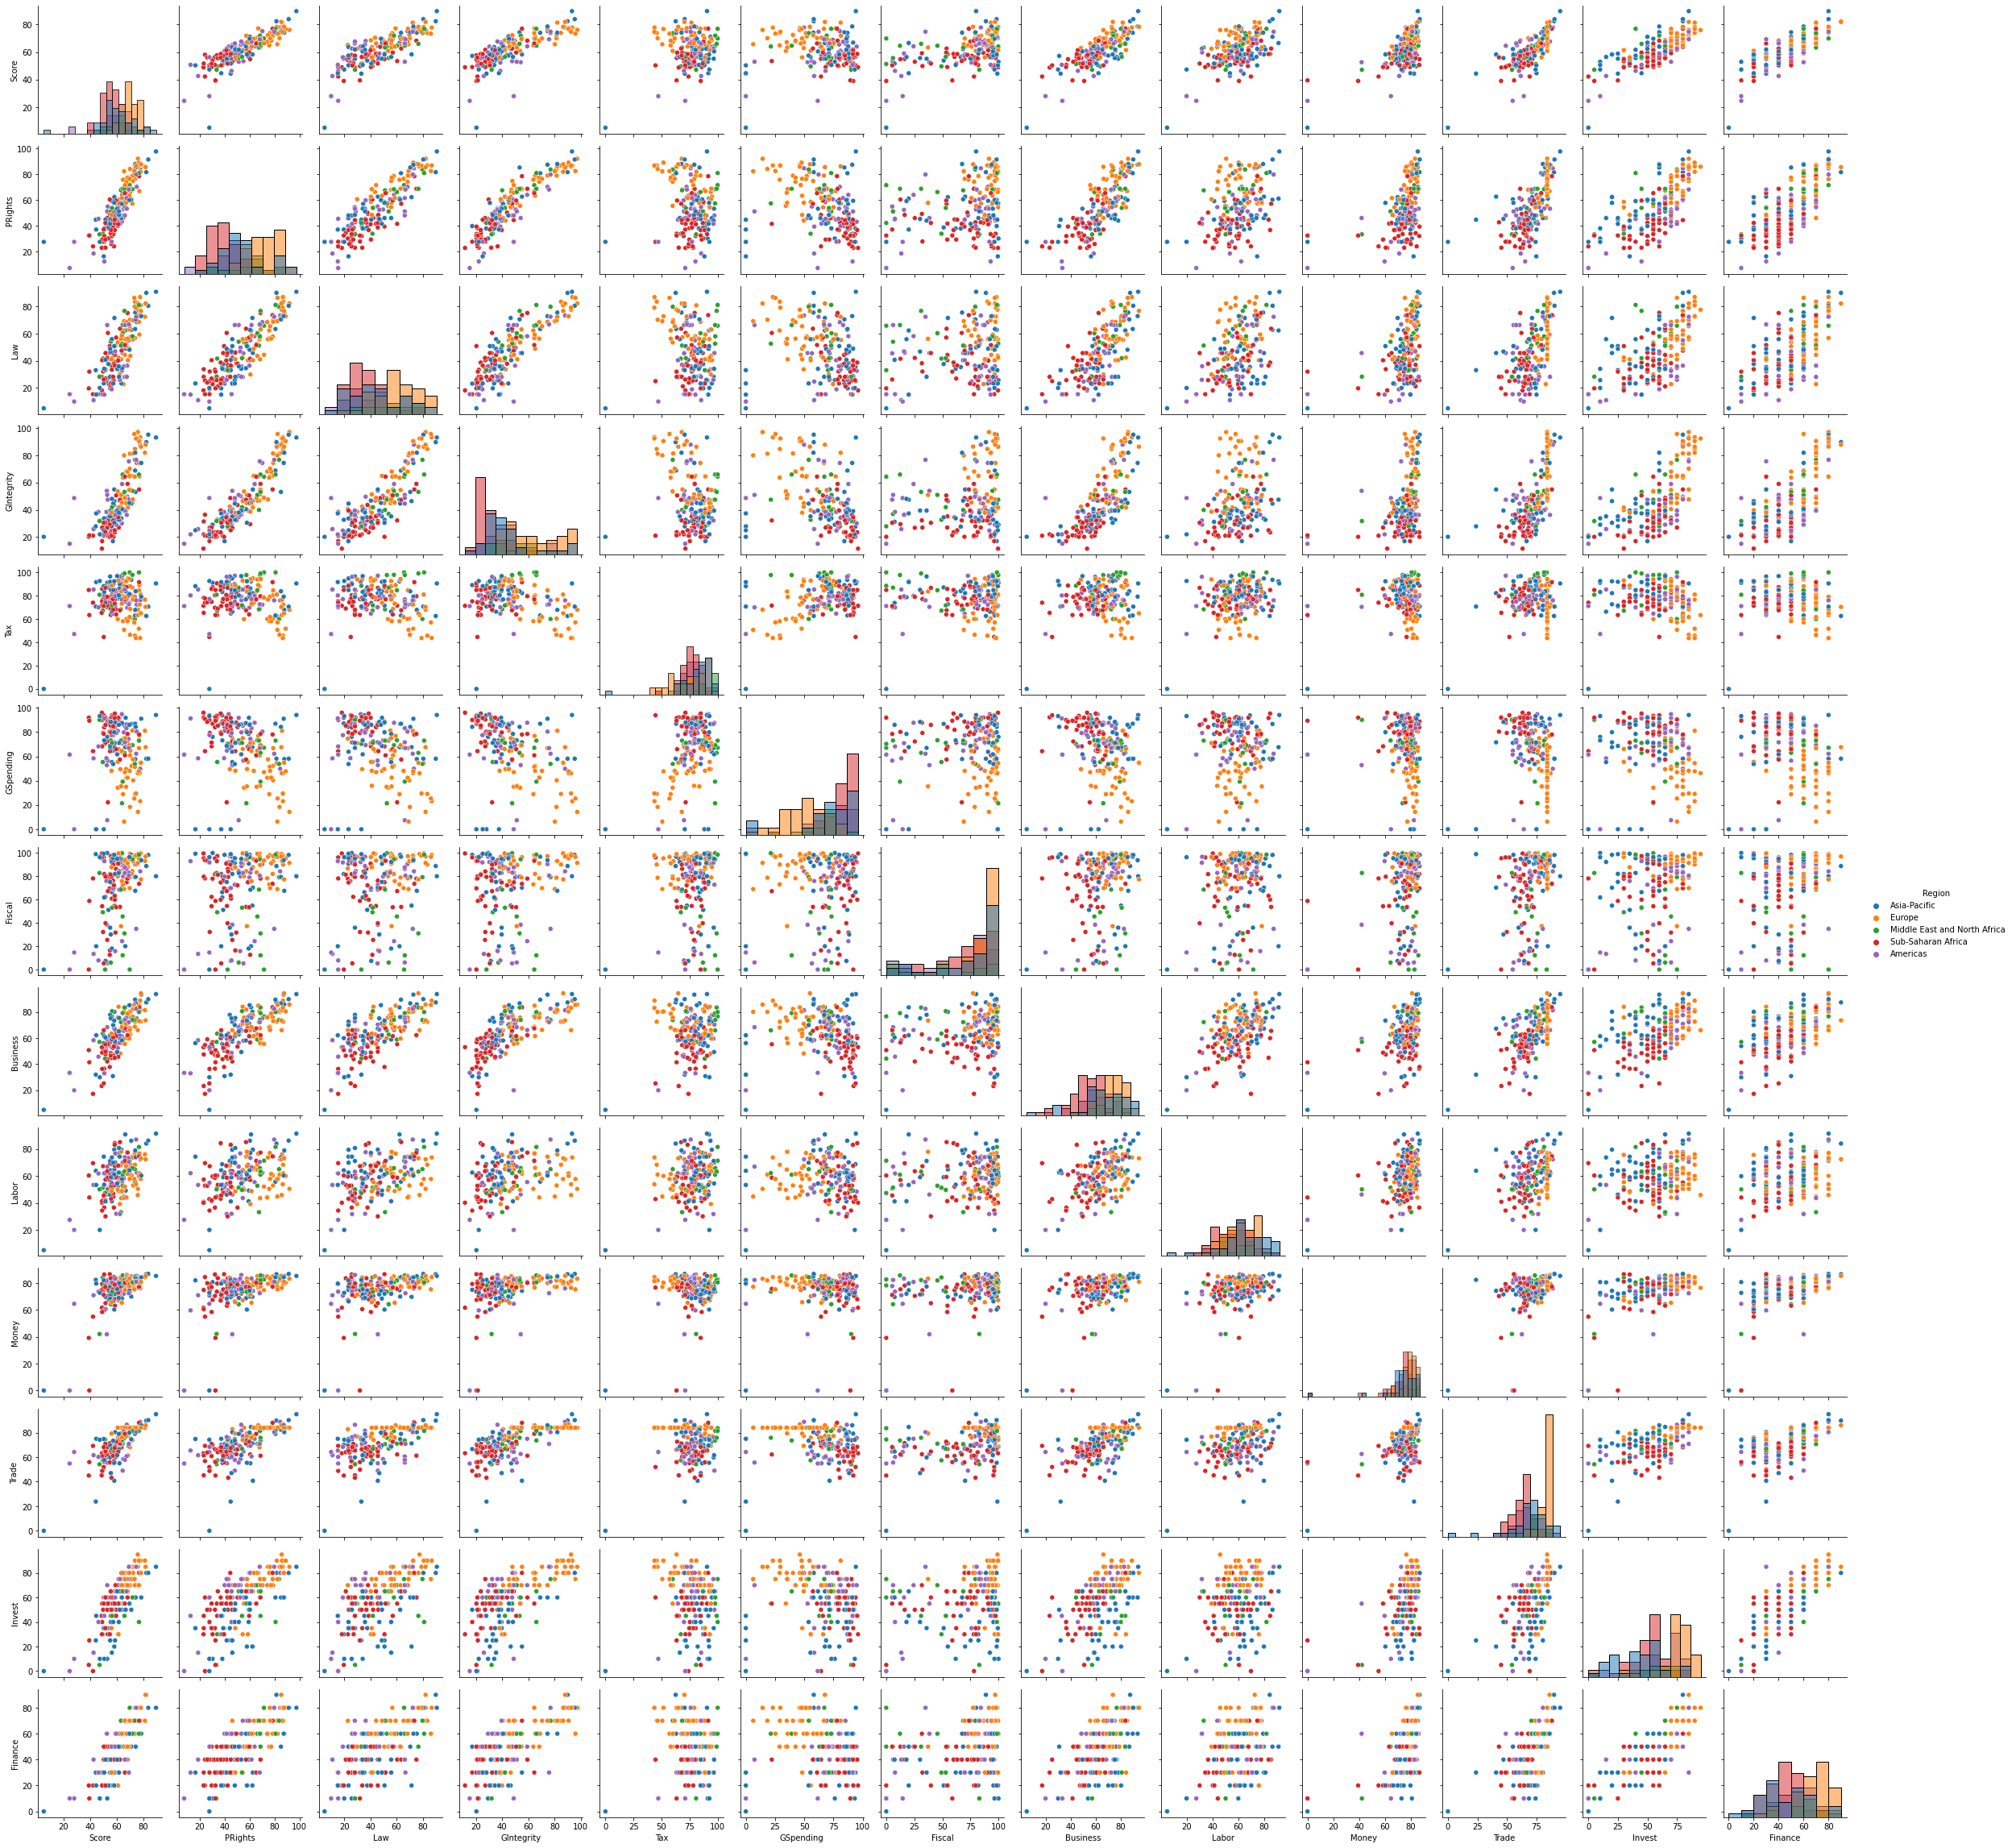

In [10]:
g = sns.PairGrid(data_region, hue="Region")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Data points are colored by different region groups. However, there is no evident finding in this aspect. The 'Region' would not be taken into account as a new factor. In scatter plots, it seems that when the variables increase, the score also increase. And the majority of them are likely to to have the linear relationship. However, the relationship of the factors, **'Tax', 'GSpending' and 'Fiscal'** between scores are not the same obvious as the others. But it would be too early to conclude they are less important than the others. And for histograms, there is no evidence to deduce anything.

#### 2.2.2 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

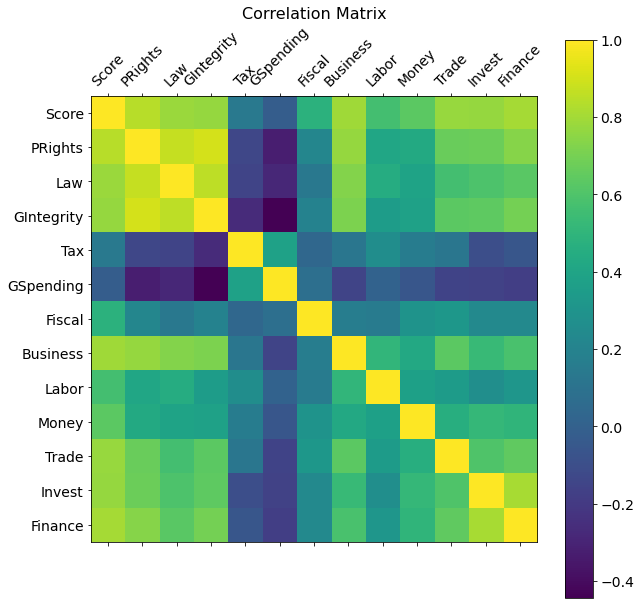

In [11]:
# For drawing correlation matrix, the Country Name should be taken out.
data_n=data.drop(['Country Name'], axis=1)

df = data_n
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10,10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

From the heatmap above, it is clear that the variables are divided into 3 groups. The group of **'Tax', 'GSpending', 'Fiscal', 'Labor' and 'Money'** have relatively smaller correlationship with scores and the other factors, which is similar to the statement deduced from scatterplots. While the group of the rest factors, **'PRights', 'Law', 'GIntegrity', 'Business', 'Trade', 'Invest', 'Finance'** have stronger relationship with each other. It is not the stage to make conclusion, but a meaningful notice in further analysis.

## 3. Methodology I - Regression

In this case, the multiple linear regression is one of the possible choices to measure the importance of these 12 variables. The logic behind this measurement is direct and simple. The higher the regression coefficient is, the larger its impact is. However, before compare the coefficients, it should consider multicollinearity.

> **Multicollinearity** means when some predictors are highly correlated, variance of the coefficient is large and the model becomes unstable and unreliable.

In reality, it is less possible to have definitely independent variables. If the level of correlation among variables are located in a tolerated range, the result of the analysis is still reasonable and reliable.

One way is to make selection after considering **VIF** values and use the results to fit a linear model. If the linear regression model is acceptable, then rank the coefficient to draw a conclusion.

> **VIF** (Variance Inflation Factors) is a measure of multicolinearity among predictors within a multiple regression task. It is the quotient of the variance in a model with multiple predictors by the variance of a model with a single predictor. If the value of VIF increases, the situation of multicollinearity is worse. If it is less than 5, nothing need to worry.

To leave space for possible comparisons and unsatisfactory results, consider another methods **LASSO**. 

> **LASSO** (Least Absolute Shrinkage and Selection Operator) is a regression method that performs both variable selection and regularisation (or penalty) in order to increase the prediction accuracy and interpretability of the regression model.

### 3.1 Predictor and Response

As mentioned above, the columns of 12 variables are predictors and the column of 'Score' is the response.

In [12]:
predictors_data = data_n.drop(columns=['Score'], axis=1)
response_data = data[['Score']]

In [13]:
predictors_data.shape

(178, 12)

In [14]:
response_data.shape

(178, 1)

### 3.2 VIF

The following codes are to calculate the VIF value of each variable.

In [15]:
# calculating VIF
def drop_column_using_vif_(df, list_var_not_to_remove, thresh=2.5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. 
     For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

list_var_not_to_remove = set()

The variables that should be dropped due to large VIF value are:

In [16]:
df_predictors_select_VIF = drop_column_using_vif_(predictors_data,list_var_not_to_remove,thresh=2.5)

Max VIF: 8.884573711523633
Dropping: PRights
Max VIF: 6.84332032305987
Dropping: GIntegrity
Max VIF: 3.521093535183244
Dropping: Finance
Max VIF: 2.973859808895046
Dropping: Law
Max VIF: 2.2281186499165226


The rest variables are:

In [17]:
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

The columns remaining after VIF selection are:
Index(['Tax', 'GSpending', 'Fiscal', 'Business', 'Labor', 'Money', 'Trade',
       'Invest'],
      dtype='object')


From above, **'PRights', 'GIntegrity', 'Finance' and 'Law'** are dropped due to high VIF value. The rest 8 variables would be used to fit a linear model.

In [18]:
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF, y=response_data)

LinearRegression()

Before rank the coefficient, it is more important to carefully look into the linear model at first.

In [19]:
# fit a lineare regression model using statsmodel
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     379.6
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          9.31e-104
Time:                        09:52:50   Log-Likelihood:                -418.64
No. Observations:                 178   AIC:                             855.3
Df Residuals:                     169   BIC:                             883.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5594      1.689      0.331      0.741      -2.776       3.895
Tax           -0.0006      0.017     -0.037      0.971      -0.035       0.034
GSpending      0.0512      0.010      5.239      0.000       0.032       0.070
Fiscal         0.0846      0.007     11.304      0.000       0.070       0.099
Business       0.2437      0.018     13.524      0.000       0.208       0.279
Labor          0.1220      0.017      7.344      0.000       0.089       0.155
Money          0.0904      0.020      4.556      0.000       0.051       0.130
Trade          0.1664      0.023      7.270      0.000       0.121       0.212
Invest         0.1778      0.013     13.657      0.000       0.152       0.203
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.378
Skew:                          -0.112   Prob(JB):                        0.828
Kurtosis:                       2.968   Cond. No.                     1.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary of the model, R-squared is 0.947, quite high value. It illustrates that 94.7% of the variance can be explained by the 8 chosen predictors. The model is well-fitting. And the p-value of **'Tax'** is larger than 0.05 which means it is not siginificant and should be dropped in the following rank list.

In [20]:
print('Constant term: ', lr.intercept_)
dfVIF = pd.DataFrame()
dfVIF['Factor-VIF'] = df_predictors_select_VIF.columns.values
dfVIF['VIF coef'] = lr.coef_.T
result1 = dfVIF.sort_values(["VIF coef"],ascending=False)[:-1]
result1["rank"] = result1['VIF coef'].rank(method='first', ascending=False)
result1

Constant term:  [0.559412]


,Factor-VIF,VIF coef,rank
3,Business,0.243714,1.0
7,Invest,0.177759,2.0
6,Trade,0.166409,3.0
4,Labor,0.122035,4.0
5,Money,0.090438,5.0
2,Fiscal,0.084615,6.0
1,GSpending,0.051197,7.0


According to the figures above, it is interesting that even all variables equal to 0, the freedom still exists and equals to 0.558. To some extent, the economic freedom exists naturally. Besides, the rank of the importance of the 7 variables is listed. **'Business'** is the strongest one in this case. When an increase of it by 1 unit also increases the predicted EFI by 0.2436 with all other factors fixed. While for **GSpending**, the same increase only lead to 0.0512 increase, which is nearly 1/5 of 0.2436.

### 3.3 LASSO

The following codes are to create the LASSO model.

In [21]:
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors_data, y=response_data)

Lasso(max_iter=100000000.0, normalize=True)

In [22]:
lasso_model.score(X=predictors_data, y=response_data)

0.0

In [23]:
df_coef_lasso = pd.DataFrame({"var": predictors_data.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso.sort_values(["coef"],ascending=False))

           var  coef
0      PRights   0.0
1          Law   0.0
2   GIntegrity   0.0
3          Tax   0.0
4    GSpending  -0.0
5       Fiscal   0.0
6     Business   0.0
7        Labor   0.0
8        Money   0.0
9        Trade   0.0
10      Invest   0.0
11     Finance   0.0


Note that Lasso requires predictors to be normalised. The step of normalisation means subtracting the mean and dividing by the standard deviation.

In [24]:
predictors_data_standardised = predictors_data/predictors_data.std(axis=0)

alphas_lasso, coefs_lasso, _ = lasso_path(predictors_data_standardised, 
                                          response_data.values.reshape(-1),
                                          alphas = [.1, .5, 1, 10, 100, 1000, 10000], 
                                          it_intercept=False)

The following code is to draw the LASSO Path.

(-1.25, 4.25, -0.3750599068881831, 7.876258044651845)

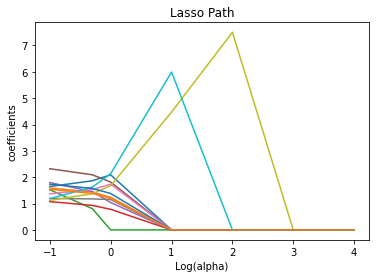

In [25]:
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

As **"lasso_model.score"** is 0, it means that the Lasso model performs badly to fit the model, as well as the LASSO path. The result of it should be ignored.

## 4. Methodology II - Classification

Apart from Regression methods, it is also possible to consider Classification algorithms. The result would be made through feature selection. The higher the feature importance is, the stronger its impact would be. But before that, it should pay attention to **overfitting**.

> **Overfitting** means that the model fits perfectly on the given dataset at the cost of doing badly on the unseen dataset.

The solution to reduce overfitting is to separate the dataset into train and test datasets. And use train data to fit the model and get the predictions. Compare them with the test datasets. If the result is acceptable, use the feature importance from the fitted model to produce the result of feature selection.

Similar as before, to ensure the space of further comparisons of results and avoid the inconclusive results, it is going to use 2 measurements, **Decision Tree and Random Forest**.

> **Decision Tree** creates a tree of probabilities or value ranges linking attribute values to classes or outcomes. If it is accurate, then rank the feature importance. And the unnecessary variables would be automatically deleted.

In case of the serious result of overfitting in Decision tree, also use Random Forest.

> **Random Forest** creates trees from random resamples of the data and a random subset of variables, then selecting the most widely predicted class. Similar to above, if accurate, rank feature importance and no worry of useless variables.


### 4.1 Train and Test data

It is necessary to split up the dataset at the beginning. In this report, it is to use the average value of the score to divide the datasets into train and test sets. The codes are stated in the following.

In [26]:
ave=np.mean(data['Score'])
ave

61.583052434456924

Use Boolean to mark 'over mean' or not.

In [27]:
a = pd.DataFrame({'over_mean':data['Score']>=ave})
b = pd.concat( [data , a], axis=1 )

In [28]:
ddd = b.drop(['over_mean','Score','Country Name'], axis=1)
y = b['over_mean']

Use "LabelEncoder" to transfer the Boolean back to integer.

In [29]:
le = LabelEncoder()
le.fit([True,False])
labels_fea = le.transform(b['over_mean'])

In [30]:
pd.Series(labels_fea).value_counts()

1    91
0    87
dtype: int64

Now the datasets are classified with labels. Then use the to_dict() function to convert the attribute dataset to a dictionary array.

In [31]:
ddd_dict = ddd.to_dict('record')

In [32]:
vec = DictVectorizer()
ddd_mat = vec.fit_transform(ddd_dict)
ddd_array = ddd_mat.toarray()

Use the "train_test_split" method and divide the data into a training set and a test set according to a 7:3 division.

In [33]:
train_d, test_d, train_lab, test_lab = train_test_split(ddd_array, labels_fea, test_size=0.30)

Check the lengths of the training and testing datasets.

In [34]:
print(train_d.shape)
print(test_d.shape)

(124, 12)
(54, 12)


### 4.2 Decision Tree

Use the following to train the decision tree model and make predictions on test data.

In [35]:
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(train_d, train_lab)
test_pred_decision_tree = clf_decision_tree.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.88      0.84      0.86        25

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



From the table above, the percentage of correct predictions, positive predictions and correct positive predictions are all over 80%. The model is well fitting. Then rank the feature importance to get the rank of important factors.

In [36]:
decision_tree = pd.DataFrame({"Factor-DT":vec.feature_names_,
                              "FI (Decision Tree)":clf_decision_tree.feature_importances_ })
result3 = decision_tree.sort_values("FI (Decision Tree)", ascending=False)
result3["rank"] = result3['FI (Decision Tree)'].rank(method='first', ascending=False)
result3

,Factor-DT,FI (Decision Tree),rank
9,PRights,0.601881,1.0
5,Invest,0.170903,2.0
2,Fiscal,0.088512,3.0
3,GIntegrity,0.052322,4.0
1,Finance,0.038427,5.0
4,GSpending,0.021595,6.0
10,Tax,0.016196,7.0
11,Trade,0.010162,8.0
0,Business,0.000000,9.0
6,Labor,0.000000,10.0


The following 2 plots are the overview of the results of the decision tree model.

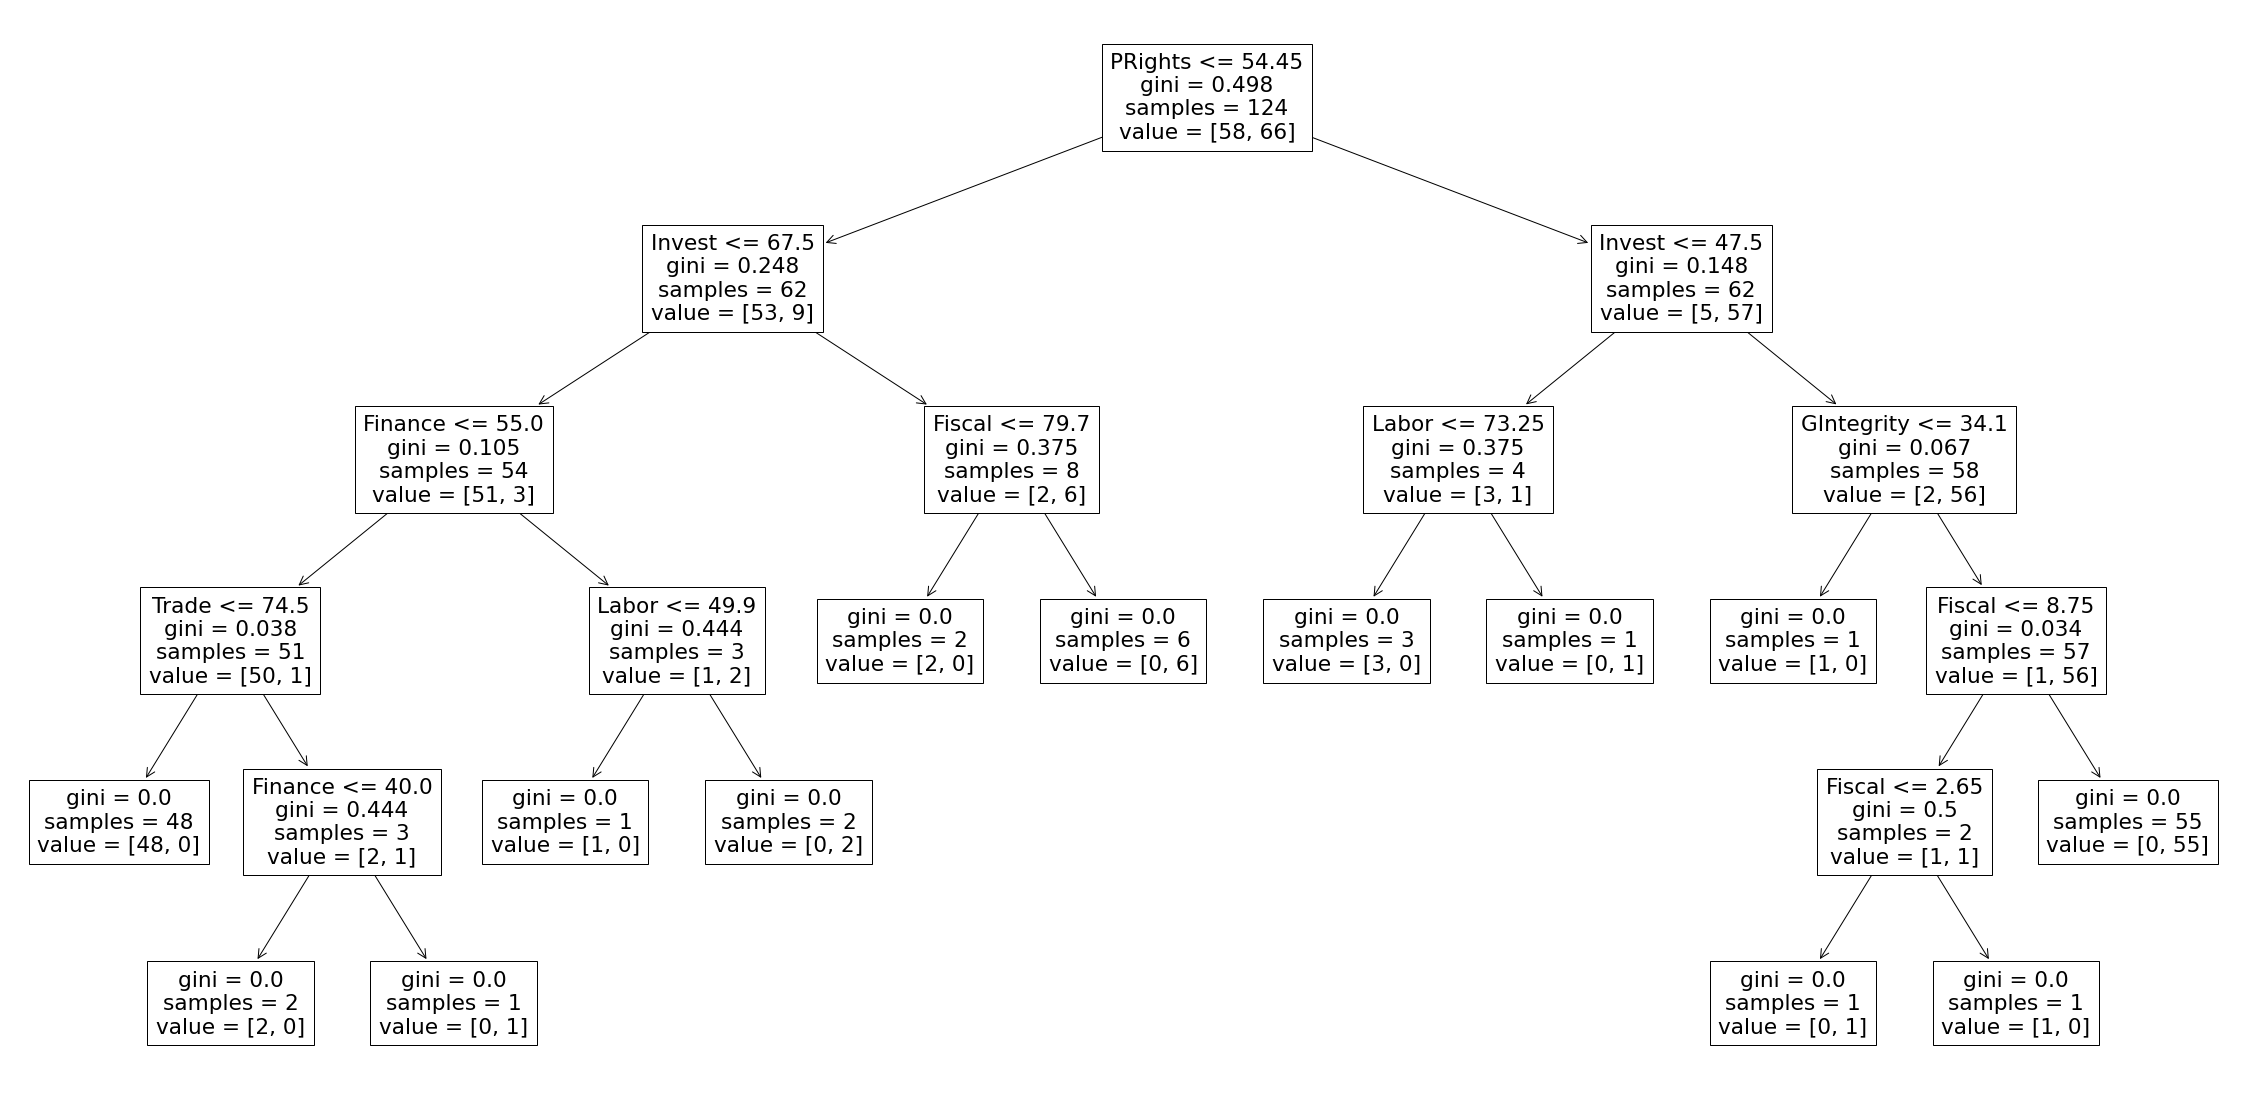

In [37]:
decision_tree_depth_5 = DecisionTreeClassifier(max_depth=12)
decision_tree_depth_5.fit(train_d, train_lab)
plt.figure(figsize=(40,20))

_ = tree.plot_tree(decision_tree_depth_5, feature_names = vec.feature_names_)
plt.show()

In [38]:
tree_rules = export_text(decision_tree_depth_5, feature_names=vec.feature_names_)
print(tree_rules)

|--- PRights <= 54.45
|   |--- Invest <= 67.50
|   |   |--- Finance <= 55.00
|   |   |   |--- Trade <= 74.50
|   |   |   |   |--- class: 0
|   |   |   |--- Trade >  74.50
|   |   |   |   |--- Finance <= 40.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Finance >  40.00
|   |   |   |   |   |--- class: 1
|   |   |--- Finance >  55.00
|   |   |   |--- Labor <= 49.90
|   |   |   |   |--- class: 0
|   |   |   |--- Labor >  49.90
|   |   |   |   |--- class: 1
|   |--- Invest >  67.50
|   |   |--- Fiscal <= 79.70
|   |   |   |--- class: 0
|   |   |--- Fiscal >  79.70
|   |   |   |--- class: 1
|--- PRights >  54.45
|   |--- Invest <= 47.50
|   |   |--- Labor <= 73.25
|   |   |   |--- class: 0
|   |   |--- Labor >  73.25
|   |   |   |--- class: 1
|   |--- Invest >  47.50
|   |   |--- GIntegrity <= 34.10
|   |   |   |--- class: 0
|   |   |--- GIntegrity >  34.10
|   |   |   |--- Fiscal <= 8.75
|   |   |   |   |--- Fiscal <= 2.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- F

### 4.3 Random Forest

Use the codes to train the random forest model and make predictions on test data.

In [39]:
clf_rf = RandomForestRegressor()
clf_rf.fit(train_d, train_lab)
test_pred_rf = clf_rf.predict(test_d)
print (metrics.classification_report(test_lab, test_pred_rf.round()))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        29
           1       0.95      0.84      0.89        25

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.91        54
weighted avg       0.91      0.91      0.91        54



From the table above, the percentage of correct predictions, positive predictions and correct positive predictions are all quite high. The model is well fitting. Then rank the feature importance to get the rank of important factors.

In [40]:
random_forest = pd.DataFrame({"Factor-RF":vec.feature_names_,
                              "FI (Random Forest)":clf_rf.feature_importances_ })
result4 = random_forest.sort_values("FI (Random Forest)", ascending=False)
result4["rank"] = result4['FI (Random Forest)'].rank(method='first', ascending=False)
result4

,Factor-RF,FI (Random Forest),rank
9,PRights,0.322409,1.0
11,Trade,0.183807,2.0
3,GIntegrity,0.160796,3.0
5,Invest,0.143059,4.0
1,Finance,0.084101,5.0
0,Business,0.027879,6.0
2,Fiscal,0.019308,7.0
10,Tax,0.017272,8.0
6,Labor,0.016016,9.0
4,GSpending,0.011033,10.0


## 5. Results and Discussion

Aggregate the results into one dataframe and present it. FI is the acronym of Feature Importance.

In [41]:
df134 = pd.merge(result4, result3, on = 'rank', how = 'left').fillna(0)
df134 = pd.merge(df134, result1,  on = 'rank', how = 'left').fillna(0)

cols = list(df134)
cols.insert(0, cols.pop(cols.index('rank')))

df134=df134.loc[:,cols]

# Be careful to run this code.
# It would cover the original .csv file.
# If lost, please go to my github link to download the copy.
# df134.to_csv('Results(RF+DT+VIF).csv',index=False).

df134

,rank,Factor-RF,FI (Random Forest),Factor-DT,FI (Decision Tree),Factor-VIF,VIF coef
0,1.0,PRights,0.322409,PRights,0.601881,Business,0.243714
1,2.0,Trade,0.183807,Invest,0.170903,Invest,0.177759
2,3.0,GIntegrity,0.160796,Fiscal,0.088512,Trade,0.166409
3,4.0,Invest,0.143059,GIntegrity,0.052322,Labor,0.122035
4,5.0,Finance,0.084101,Finance,0.038427,Money,0.090438
5,6.0,Business,0.027879,GSpending,0.021595,Fiscal,0.084615
6,7.0,Fiscal,0.019308,Tax,0.016196,GSpending,0.051197
7,8.0,Tax,0.017272,Trade,0.010162,0,0.000000
8,9.0,Labor,0.016016,Business,0.000000,0,0.000000
9,10.0,GSpending,0.011033,Labor,0.000000,0,0.000000


Notice the outcome of Random Forest and Decision Tree might have slight difference. To ensure the correspondence of illustrative statements with the figures, it is going to save one result as .csv file and import it again for further discussion.

In [42]:
results = pd.read_csv('Results(RF+DT+VIF).csv')
results

,rank,Factor-RF,FI (Random Forest),Factor-DT,FI (Decision Tree),Factor-VIF,VIF coef
0,1.0,Trade,0.386043,Trade,0.550245,Business,0.243714
1,2.0,Invest,0.140375,Invest,0.280981,Invest,0.177759
2,3.0,PRights,0.137298,Business,0.138233,Trade,0.166409
3,4.0,Business,0.090830,Tax,0.030541,Labor,0.122035
4,5.0,Finance,0.072632,Finance,0.000000,Money,0.090438
5,6.0,GIntegrity,0.068475,Fiscal,0.000000,Fiscal,0.084615
6,7.0,Tax,0.038986,GIntegrity,0.000000,GSpending,0.051197
7,8.0,Fiscal,0.019910,GSpending,0.000000,0,0.000000
8,9.0,Labor,0.019567,Labor,0.000000,0,0.000000
9,10.0,Money,0.016809,Law,0.000000,0,0.000000


From the table above, it is clear that **'Business', 'Trade' and 'Investment'** are always ranked as two of the highest 3 variables. Another point is that the ranking  of **'Fiscal'** is located in the mid-level. The difference of results between regression method and classification method is also obvious.  **'Finance'**, which has relatively higher ranking in classification method, are dropped in the regression algorithm. Similarly, **'Money' and 'Labor'** has upper-level ranking in regression but low in classification. In Decision Tree, they even equal to 0. Hence, for these variables, no conclusion can be made.

Therefore, according to the outcome of the 3 techniques, the conclusive statement is:

- The freedom of **'Business'**, **'Trade'** and **'Investment'** are always more important than the other factors;
- The freedom of **'Fiscal'** are less important than the 2 above but sometimes more importnat than the others.

Recall their definition, **'Business'**, **'Trade'** and **'Investment'** are the cost of a business, the tariff and nontariff barriers of imports and exports, and the constraint of investment capital. **'Fiscal'** means the government budegt of debt and deficit. If a country performs well in the first two, it should be a economy which offers more free space for internal and external business. When performs well in the last two, it should be a government which has a balanced fiscal position with a stable resilience to risk. In other words, to raise the EFI requires firstly a more open attitude towards business, both domestically and internationally, and secondly a stable government revenues and domesstic economic market.

**Limitation**

In the preparation step, NA values are checked, but not the outliers. If there exists, the accuracy of the multiple linear regression model and classfication model will be greatly compromised. The possible solution could be box plots or violin plots. They can look into details of the distribution of data and are sensitive to rare values. Also the residuals and errors are not studied as well. If possible, looking into these details might suggest to delete some data points to provide more accurate results. Additionally, the output of Decision Tree and Random Forest are not always stable. The difference of feature importance might result in difference conclusion. If appropriate, it deserves to compare with the results produced by other feature selection alrogithms.

## 6. Conclusion

This research firstly explores the distribution and correlation among the 12 freedom variables and their response data EFI. Then it applies the multiple linear regression method to compare the coefficient of variables to rank the importance of them. To avoid the multicollinearity, VIF values are checked before fitting linear model. Though LASSO is a useful technique to deal with multicollinearity, its result is not satisfied. In addition, use 2 classification method, Decision Tree and Random Forest to introduce importance feature to get the importance ranking of vaariables. In summary, the freedom of Business, Trade and Investment have larger impact on EFI than the others, fiscal health have slightly bigger impact at some point. 

---

## 7. References

[1] Berggren, N., 2003. The benefits of economic freedom: a survey. *The independent review,* 8(2), pp.193-211.

[2] Corbi, R.B., 2007. The components of economic freedom, income and growth: an empirical analysis. *Estudos Econômicos (São Paulo),* 37(3), pp.515-545.

[3] Esposto, A.; Zaleski, P. Economic freedom and the quality of life. *Constitutional Political Economy,* 10, p. 185-197, 1999

[4] HERITAGE FOUNDATION (WASHINGTON, D.C.), & WALL STREET JOURNAL (FIRM). (2021). *The index of economic freedom.* Washington, D.C., Heritage Foundation.



---

## 8. Word count

In [44]:
import io
from IPython.nbformat import current

with io.open('DSSS-CW-19161032.ipynb', 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print(word_count)

2675
